Importing Libraries 

In [1]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from argparse import Namespace
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier

MAGNITUDE = True
SEED = 0

Definitions

In [2]:
def load_data(data_dir, return_mag=True):
    data = scipy.io.loadmat(data_dir)
    d, t,r = data['data'], data['target'],data['gases_ratios']
    r = r[:, -1].reshape(-1, 1)
    if return_mag:
        d = np.abs(d)
    else:
        dreal = np.real(d)
        dimg = np.imag(d)
        d = np.concatenate([dreal, dimg], axis=1)
    return d.astype(np.float32), t.astype(np.float32),r.astype(np.float32)

scaler = StandardScaler() 
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

Loading the Data

In [30]:
'''Loading the Data in the Case of one File'''
DATA_DIR = "training_SNR_140_samples250/test_distance_100.mat"
data = scipy.io.loadmat(DATA_DIR)
print(f"data contains (the keys!): {[k for k in data.keys() if not k.startswith('__')]}")
data = Namespace(**data)
tmp2 = data.distance
X_train,y_train,IDC = load_data(DATA_DIR, MAGNITUDE)


'''Loading the Data in the Case of multiple Files'''
# features = []
# labels = []
# distances = []
# for i in range(1,41):
#     if i<10:
#         DATA_DIR_i = f"tr_distance_scenarios_10meters_var/training_distances_0{i}.mat"
#     else:
#         DATA_DIR_i = f"tr_distance_scenarios_10meters_var/training_distances_{i}.mat"
#     # distances.append(Namespace(**scipy.io.loadmat(DATA_DIR_i)).distance)
#     f, l,r = load_data(DATA_DIR_i, MAGNITUDE)
#     features.append(f)  
#     labels.append(l)
# for i in range(1,8):
#     if i<10:
#         DATA_DIR_i = f"newest_data/tsnr_distance_90_scenarios/tsnr_training_90_distances_0{i}.mat"
#     # distances.append(Namespace(**scipy.io.loadmat(DATA_DIR_i)).distance)
#     f, l,r = load_data(DATA_DIR_i, MAGNITUDE)
#     features.append(f)  
#     labels.append(l)
# for i in range(1,8):
#     if i<10:
#         DATA_DIR_i = f"newest_data/tsnr_distance_100_scenarios/tsnr_training_100_distances_0{i}.mat"
#     # distances.append(Namespace(**scipy.io.loadmat(DATA_DIR_i)).distance)
#     f, l,r = load_data(DATA_DIR_i, MAGNITUDE)
#     features.append(f)  
#     labels.append(l)
# for j in range(10,101,10):
#     for i in range(1,8):

#         DATA_DIR_j = f"newest_data/tsnr_distance_{j}_scenarios/tsnr_training_{j}_distances_0{i}.mat"
#         f, l,r = load_data(DATA_DIR_j, MAGNITUDE)
#         features.append(f)  
#         labels.append(l)
# X_train = np.concatenate(features, axis=0)
# y_train = np.concatenate(labels, axis=0)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

data contains (the keys!): ['params', 'data', 'target', 'gases', 'gases_ratios', 'distance']
X_train shape: (250, 256)
y_train shape: (250, 1)


Splitting the Data for Classification

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(features, labels) # for classification
# y_train = y_train.squeeze()
# y_test = y_test.squeeze()
# DATA_DIR_test = f"newest_data/tsnr_distance_{90}_scenarios/tsnr_training_{90}_distances_0{1}.mat"
DATA_DIR_test = "testing_SNR_140/test_distance_150.mat"
data = scipy.io.loadmat(DATA_DIR_test)
data = Namespace(**data)
tmp2 = data.distance
X_test,y_test,IDC = load_data(DATA_DIR_test, MAGNITUDE)
y_train = y_train.squeeze()
y_test = y_test.squeeze()
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (100, 256)
y_test shape: (100,)


Applying Scaling and PCA

In [32]:
'''Scaling'''
X_train_sc = scaler.fit_transform(X_train)
print(X_train_sc.shape)
X_test_sc = scaler.transform(X_test)

'''PCA with n = 1'''
X_train_sc_pca_1 = pca_1d.fit_transform(X_train_sc)
X_test_sc_pca_1 = pca_1d.transform(X_test_sc)

'''PCA with n = 2'''
X_train_sc_pca_2 = pca_2d.fit_transform(X_train_sc)
X_test_sc_pca_2 = pca_2d.transform(X_test_sc)

'''PCA with n = 3'''
X_train_sc_pca_3 = pca_3d.fit_transform(X_train_sc)
X_test_sc_pca_3 = pca_3d.transform(X_test_sc)
print(X_train_sc_pca_2.shape)

(250, 256)
(250, 2)


Visualizing the data using PCA

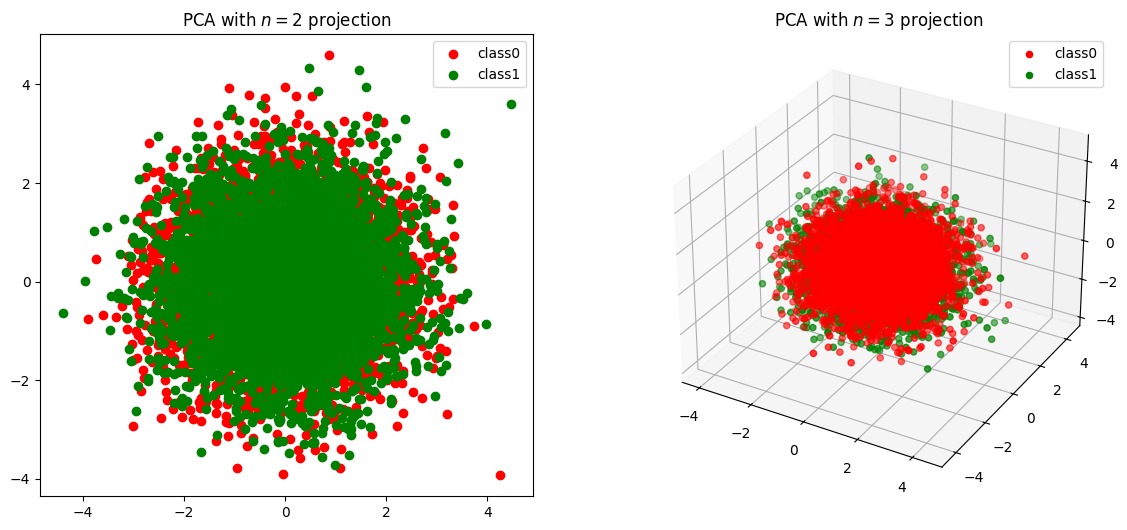

In [68]:
mask_zero = y_train == 0 
mask_one = ~ mask_zero

fig = plt.figure(figsize=(14, 6))

'''2D PCA Plot'''
ax1 = fig.add_subplot(1, 2, 1) 
sc0 = ax1.scatter(X_train_sc_pca_2[mask_zero, 0], X_train_sc_pca_2[mask_zero, 1], color='r')
sc1 = ax1.scatter(X_train_sc_pca_2[mask_one, 0], X_train_sc_pca_2[mask_one, 1], color='g')
ax1.legend([sc0, sc1], ['class0', 'class1'])
ax1.set_title("PCA with $n=2$ projection")

'''3D PCA plot'''
ax2 = fig.add_subplot(1, 2, 2, projection='3d') 
p1 = ax2.scatter(X_train_sc_pca_3[mask_zero, 0], X_train_sc_pca_3[mask_zero, 1], X_train_sc_pca_3[mask_zero, 2], color='r')
p2 = ax2.scatter(X_train_sc_pca_3[mask_one, 0], X_train_sc_pca_3[mask_one, 1], X_train_sc_pca_3[mask_one, 2], color='g')
ax2.legend([p1, p2], ['class0', 'class1'])
ax2.set_title("PCA with $n=3$ projection")


plt.show()

# Logistic Regression Models

Logistic Regression with PCA(n=3)

In [33]:
LOG_3 = LogisticRegression()
LOG_3.fit(X_train_sc_pca_3, y_train) 
acc_train_LOG_3 = accuracy_score(y_train, LOG_3.predict(X_train_sc_pca_3))
acc_test_LOG_3 = accuracy_score(y_test, LOG_3.predict(X_test_sc_pca_3))
print(f"Logistic Regression with PCA (n=3) train accuracy: {acc_train_LOG_3:.3f}, test accuracy {acc_test_LOG_3:.3f}")

Logistic Regression with PCA (n=3) train accuracy: 0.572, test accuracy 0.530


Logistic Regression with PCA(n=2)

In [34]:
LOG_2 = LogisticRegression()
LOG_2.fit(X_train_sc_pca_2, y_train) 
acc_train_LOG_2 = accuracy_score(y_train, LOG_2.predict(X_train_sc_pca_2))
acc_test_LOG_2 = accuracy_score(y_test, LOG_2.predict(X_test_sc_pca_2))
print(f"Logistic Regression with PCA (n=2) train accuracy: {acc_train_LOG_2:.3f}, test accuracy {acc_test_LOG_2:.3f}")

Logistic Regression with PCA (n=2) train accuracy: 0.528, test accuracy 0.520


Logistic Regression with PCA(n=1)

In [37]:
LOG_1 = LogisticRegression()
LOG_1.fit(X_train_sc_pca_1, y_train) 
acc_train_LOG_1 = accuracy_score(y_train, LOG_1.predict(X_train_sc_pca_1))
acc_test_LOG_1 = accuracy_score(y_test, LOG_1.predict(X_test_sc_pca_1))
print(f"Logistic Regression with PCA (n=1) train accuracy: {acc_train_LOG_1:.3f}, test accuracy {acc_test_LOG_1:.3f}")

Logistic Regression with PCA (n=1) train accuracy: 0.502, test accuracy 0.510


Logistic Regression with Scaled Features

In [70]:
LOG_sc = LogisticRegression()
LOG_sc.fit(X_train_sc, y_train) 
acc_train_LOG_sc = accuracy_score(y_train, LOG_sc.predict(X_train_sc))
acc_test_LOG_sc = accuracy_score(y_test, LOG_sc.predict(X_test_sc))
print(f"Logistic Regression with scaled features train accuracy: {acc_train_LOG_sc:.3f}, test accuracy {acc_test_LOG_sc:.3f}")

Logistic Regression with scaled features train accuracy: 0.569, test accuracy 0.569


Logistic Regression with Unscaled Features

In [71]:
LOG = LogisticRegression()
LOG.fit(X_train, y_train) 
acc_train_LOG = accuracy_score(y_train, LOG.predict(X_train))
acc_test_LOG = accuracy_score(y_test, LOG.predict(X_test))
print(f"Logistic Regression with unscaled features train accuracy: {acc_train_LOG:.3f}, test accuracy {acc_test_LOG:.3f}")

Logistic Regression with unscaled features train accuracy: 0.569, test accuracy 0.569


# Quadratic Discriminant Analysis Models (QDA)

QDA with PCA(n=3)

In [72]:
QDA_3 = QuadraticDiscriminantAnalysis()
QDA_3.fit(X_train_sc_pca_3, y_train) 
acc_train_QDA_n_3 = accuracy_score(y_train, QDA_3.predict(X_train_sc_pca_3))
acc_test_QDA_n_3 = accuracy_score(y_test, QDA_3.predict(X_test_sc_pca_3))
print(f"QDA with PCA(n=3) train accuracy: {acc_train_QDA_n_3:.3f}, test accuracy {acc_test_QDA_n_3:.3f}")

QDA with PCA(n=3) train accuracy: 0.510, test accuracy 0.510


QDA with PCA(n=2)

In [45]:
QDA_2 = QuadraticDiscriminantAnalysis()
QDA_2.fit(X_train_sc_pca_2, y_train) 
acc_train_QDA_n_2 = accuracy_score(y_train, QDA_2.predict(X_train_sc_pca_2))
acc_test_QDA_n_2 = accuracy_score(y_test, QDA_2.predict(X_test_sc_pca_2))
print(f"QDA with PCA(n=2) train accuracy: {acc_train_QDA_n_2:.3f}, test accuracy {acc_test_QDA_n_2:.3f}")

QDA with PCA(n=2) train accuracy: 0.502, test accuracy 0.510


Quadratic Discriminant Analysis (QDA) with PCA(n=1)

In [44]:
QDA_1 = QuadraticDiscriminantAnalysis()
QDA_1.fit(X_train_sc_pca_1, y_train) 
acc_train_QDA_n_1 = accuracy_score(y_train, QDA_1.predict(X_train_sc_pca_1))
acc_test_QDA_n_1 = accuracy_score(y_test, QDA_1.predict(X_test_sc_pca_1))
print(f"QDA with PCA(n=1) train accuracy: {acc_train_QDA_n_1:.3f}, test accuracy {acc_test_QDA_n_1:.3f}")

QDA with PCA(n=1) train accuracy: 0.502, test accuracy 0.510


Quadratic Discriminant Analysis (QDA) with Scaled Features

In [74]:
QDA_sc = QuadraticDiscriminantAnalysis()
QDA_sc.fit(X_train_sc, y_train) 
acc_train_QDA_sc = accuracy_score(y_train, QDA_sc.predict(X_train_sc))
acc_test_QDA_sc = accuracy_score(y_test, QDA_sc.predict(X_test_sc))
print(f"QDA with scaled features train accuracy: {acc_train_QDA_sc:.3f}, test accuracy {acc_test_QDA_sc:.3f}")

QDA with scaled features train accuracy: 0.963, test accuracy 0.963


Quadratic Discriminant Analysis (QDA) with Unscaled features

In [42]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train) 
acc_train_QDA = accuracy_score(y_train, QDA.predict(X_train))
acc_test_QDA = accuracy_score(y_test, QDA.predict(X_test))
print(f"QDA with unscaled features train accuracy: {acc_train_QDA:.3f}, test accuracy {acc_test_QDA:.3f}")

QDA with unscaled features train accuracy: 0.573, test accuracy 0.510


# Gradient Boosting Models

Gradient Boosting with Unscaled Features

In [75]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
acc_train_gbm = accuracy_score(y_train, gbm.predict(X_train))
acc_test_gbm = accuracy_score(y_test, gbm.predict(X_test))  
print(f"Gradient Boosting with unscaled features train accuracy: {acc_train_gbm:.3f}, test accuracy {acc_test_gbm:.3f}")

Gradient Boosting with unscaled features train accuracy: 0.754, test accuracy 0.754
